In [1]:
import numpy

# things we already know
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor


# things we learn today
import pandas

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR

## Plotting in IPython

below we use a **magic function**. It is a term!

It says: activate matplotlib, show plots inline

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

[-3 -2 -1  0  1  2  3  4]
[ 9  4  1  0  1  4  9 16]


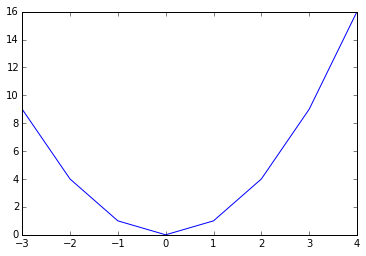

In [3]:
x = numpy.array([-3, -2, -1, 0, 1, 2, 3, 4])
print x
print x ** 2

plt.plot(x, x ** 2)

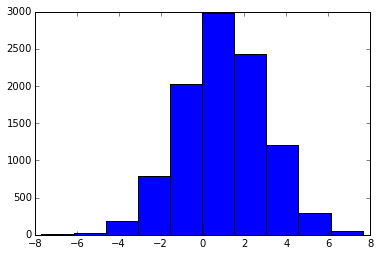

In [4]:
distribution = numpy.random.normal(loc=1., scale=2, size=10000)
plt.hist(distribution)
pass

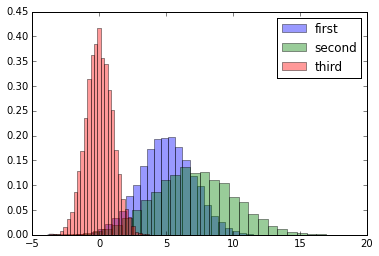

In [5]:
plt.hist(numpy.random.normal(loc=5., scale=2, size=10000), bins=30, alpha=0.4, normed=True, label='first')
plt.hist(numpy.random.normal(loc=7., scale=3, size=10000), bins=30, alpha=0.4, normed=True, label='second')
plt.hist(numpy.random.normal(loc=0., scale=1, size=10000), bins=30, alpha=0.4, normed=True, label='third')
plt.legend()
pass

/Users/axelr/.conda/envs/rep/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


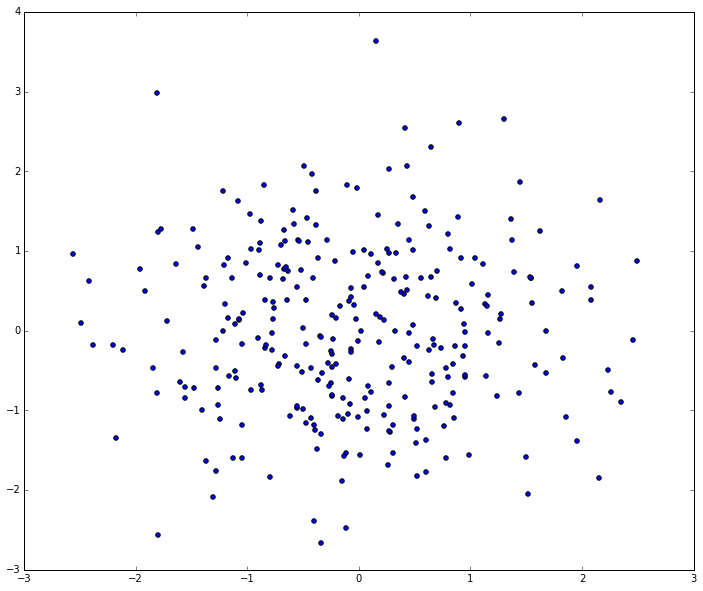

In [6]:
# Large scatter plot
plt.figure(figsize=[12, 10])
plt.scatter(numpy.random.normal(size=300), numpy.random.normal(size=300))

## Magics

magics are not needed so far, those are just for the information

In [7]:
# sample two arrays of random numbers sampled from unifrom [0, 1]
a = numpy.random.random(size=1000000)
b = numpy.random.random(size=1000000)
# measure time needed for operation
%time result = a + b

CPU times: user 2.73 ms, sys: 2.78 ms, total: 5.52 ms
Wall time: 5.55 ms


In [8]:
%%time
# measure the time needed to run whole cell (%%, not %)
a = numpy.random.random(size=1000000)
b = numpy.random.random(size=1000000)
result = a + b

CPU times: user 42.3 ms, sys: 7.85 ms, total: 50.1 ms
Wall time: 50.6 ms


In [9]:
# profiling of complex code
%prun numpy.histogram(x)

In [10]:
# general info about magics in IPython
%magic

following code works on my computer, since I have ruby installed

In [11]:
%%ruby
def greet
   puts 'Hello from Ruby!'
end
greet()

Hello from Ruby!


# Pandas

Downloading dataset

In [12]:
!head data/winequality-white.csv

head: data/winequality-white.csv: No such file or directory


In [13]:
data = pandas.read_csv('data/2-winequality-white.csv', sep=';')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0,6


In [14]:
y = data['quality']
X = data.drop('quality', axis=1)

In [15]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0


## Operations with pandas

In [16]:
#leaving only 14 rows for testing
test_frame = data[:14].copy()

In [17]:
test_frame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28,129,0.9938,3.22,0.45,11.0,6


In [18]:
test_frame['density']

0     1.0010
1     0.9940
2     0.9951
3     0.9956
4     0.9956
5     0.9951
6     0.9949
7     1.0010
8     0.9940
9     0.9938
10    0.9908
11    0.9947
12    0.9920
13    0.9912
Name: density, dtype: float64

In [19]:
# converting to numpy.array
test_frame['density'].values

array([ 1.001 ,  0.994 ,  0.9951,  0.9956,  0.9956,  0.9951,  0.9949,
        1.001 ,  0.994 ,  0.9938,  0.9908,  0.9947,  0.992 ,  0.9912])

In [20]:
test_frame['fixed acidity'][:5]

0    7.0
1    6.3
2    8.1
3    7.2
4    7.2
Name: fixed acidity, dtype: float64

In [21]:
# indexing with numbers - iloc
test_frame.iloc[[0, 4, 7], 2:7]

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
0,0.36,20.7,0.045,45,170
4,0.32,8.5,0.058,47,186
7,0.36,20.7,0.045,45,170


In [22]:
# indexing with named labels - loc
test_frame.loc[:, ['volatile acidity', 'fixed acidity']]

,volatile acidity,fixed acidity
0,0.27,7.0
1,0.30,6.3
2,0.28,8.1
3,0.23,7.2
4,0.23,7.2
5,0.28,8.1
6,0.32,6.2
7,0.27,7.0
8,0.30,6.3
9,0.22,8.1


In [23]:
# shortcut for previous
test_frame[['volatile acidity', 'fixed acidity']]

,volatile acidity,fixed acidity
0,0.27,7.0
1,0.30,6.3
2,0.28,8.1
3,0.23,7.2
4,0.23,7.2
5,0.28,8.1
6,0.32,6.2
7,0.27,7.0
8,0.30,6.3
9,0.22,8.1


In [24]:
test_frame.iloc[::3, ::-1]

,quality,alcohol,sulphates,pH,density,total sulfur dioxide,free sulfur dioxide,chlorides,residual sugar,citric acid,volatile acidity,fixed acidity
0,6,8.8,0.45,3.00,1.0010,170,45,0.045,20.7,0.36,0.27,7.0
3,6,9.9,0.40,3.19,0.9956,186,47,0.058,8.5,0.32,0.23,7.2
6,6,9.6,0.47,3.18,0.9949,136,30,0.045,7.0,0.16,0.32,6.2
9,6,11.0,0.45,3.22,0.9938,129,28,0.044,1.5,0.43,0.22,8.1
12,5,10.8,0.63,3.18,0.9920,75,16,0.040,1.2,0.37,0.18,7.9


In [25]:
# adding new feature
test_frame['dioxide sum'] = test_frame['total sulfur dioxide'] + test_frame['free sulfur dioxide']
test_frame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,dioxide sum
0,7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6,215
1,6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6,146
2,8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6,127
3,7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6,233
4,7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6,233
5,8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6,127
6,6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6,166
7,7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6,215
8,6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6,146
9,8.1,0.22,0.43,1.50,0.044,28,129,0.9938,3.22,0.45,11.0,6,157


In [26]:
filtered_data = data[data['density'] < 0.988]
filtered_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2945,4.9,0.330,0.31,1.2,0.016,39,150,0.98713,3.33,0.59,14.00,8
3367,6.0,0.290,0.25,1.4,0.033,30,114,0.98794,3.08,0.43,13.20,6
3370,6.0,0.290,0.25,1.4,0.033,30,114,0.98794,3.08,0.43,13.20,6
3673,5.4,0.300,0.30,1.2,0.029,25,93,0.98742,3.31,0.40,13.60,7
3676,5.3,0.300,0.30,1.2,0.029,25,93,0.98742,3.31,0.40,13.60,7
3710,4.7,0.670,0.09,1.0,0.020,5,9,0.98722,3.30,0.34,13.60,5
3773,5.0,0.610,0.12,1.3,0.009,65,100,0.98740,3.26,0.37,13.50,5
3904,5.0,0.455,0.18,1.9,0.036,33,106,0.98746,3.21,0.83,14.00,7
3915,4.7,0.455,0.18,1.9,0.036,33,106,0.98746,3.21,0.83,14.00,7
3918,6.4,0.350,0.28,1.6,0.037,31,113,0.98779,3.12,0.40,14.20,7


In [27]:
print len(test_frame), test_frame.shape 
print test_frame.columns

14 (14, 13)
Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'dioxide sum'],
      dtype='object')


<matplotlib.colorbar.Colorbar instance at 0x10c84e3f8>

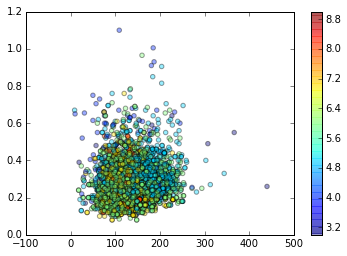

In [28]:
plt.scatter(X['total sulfur dioxide'], X['volatile acidity'], c=y, alpha=0.4)
plt.colorbar()

## Exercise
1. plot histograms of all features in dataset
2. Let's classify wines in:
   * good means quality >= 7
   * bad means quality <= 4
   * mediocre means quality five or six
   
   Plot histograms of all features for good and bad wines. Which feature is most discriminative?
   
3. Plot some scatter plots:
   - alcohol vs fixed acidity for good and bad wines, what can we say about good wines?
   - alcohol vs fixed acidity for quality=5 and quality=6
   - alcohol vs density for good and bad wines. What can we conclude?

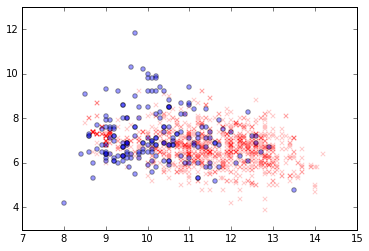

In [29]:
plt.scatter(X.loc[y>=7, 'alcohol'].values, X.loc[y>=7, 'fixed acidity'].values, c='r', alpha=0.2, marker='x')
plt.scatter(X.loc[y<5,  'alcohol'].values, X.loc[y<5,  'fixed acidity'].values, c='b', alpha=0.4)
# plt.ylim(0.988, 1.001)
# plt.colorbar()

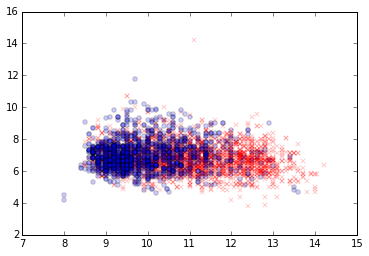

In [30]:
is_good = y >=6
is_bad = y <=5
is_med = y == 6

plt.scatter(X.loc[is_good, 'alcohol'].values, X.loc[is_good, 'fixed acidity'].values, c='r', alpha=0.2, marker='x')
# plt.scatter(X.loc[is_med,  'alcohol'].values, X.loc[is_med,  'fixed acidity'].values, c='g', alpha=0.2)
plt.scatter(X.loc[is_bad,  'alcohol'].values, X.loc[is_bad,  'fixed acidity'].values, c='b', alpha=0.2)
# plt.ylim(0.988, 1.001)
# plt.colorbar()

(array([   20.,   163.,  1457.,  2198.,   880.,   175.,     5.,     0.]),
 array([  2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,  10.5]),
 <a list of 8 Patch objects>)

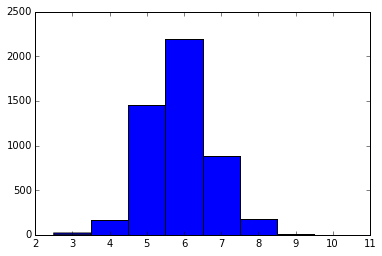

In [31]:
plt.hist(y, bins=8, range=(2.5, 10.5))

(0.988, 1.001)

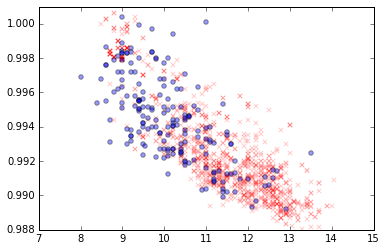

In [32]:
plt.scatter(X.loc[y>=7, 'alcohol'].values, X.loc[y>=7, 'density'].values, c='r', alpha=0.2, marker='x')
plt.scatter(X.loc[y<5,  'alcohol'].values, X.loc[y<5,  'density'].values, c='b', alpha=0.4)
plt.ylim(0.988, 1.001)
# plt.colorbar()

In [33]:
trainX, testX, trainY, testY = train_test_split(X, y, random_state=42)

## Linear models

In [34]:
for alpha in [0., 0.001, 0.01, 0.1, 1, 10, 100]:
    linear_reg = Ridge(alpha)
    linear_reg.fit(trainX, trainY)
    print alpha, '\t', mean_squared_error(testY, linear_reg.predict(testX)) 

0.0 	0.564587791519
0.001 	0.568293991144
0.01 	0.573570550784
0.1 	0.574990791682
1 	0.575287625141
10 	0.576469007479
100 	0.593064358623


## Linear models with non linear features

In [35]:
from sklearn.preprocessing import StandardScaler

X_extend = StandardScaler().fit_transform(X)
X_extend = pandas.DataFrame(X_extend, columns=X.columns)

for f in X_extend.columns:
    X_extend[f + '_abs']  = numpy.abs(X_extend[f])
    X_extend[f + '_tanh'] = numpy.tanh(X_extend[f])

In [36]:
trainX_ex, testX_ex = train_test_split(X_extend, random_state=42)

In [37]:
for alpha in [0., 0.001, 0.01, 0.1, 1, 10, 100]:
    linear_reg = Ridge(alpha)
    linear_reg.fit(trainX_ex, trainY)
    print alpha, '\t', mean_squared_error(testY, linear_reg.predict(testX_ex)) 

0.0 	0.516931032212
0.001 	0.516931019462
0.01 	0.516930904672
0.1 	0.516929753694
1 	0.516918023577
10 	0.516826197999
100 	0.518524350888
